## Real Time data

Real-Time quality control is a set of automatic procedures that are performed at the National Data Acquisition Centers (DACs) to carry out the first quality control of the data. 
There are a total of 19 tests that aim, to say, easy to identify anomalies in the data. The subtle anomalies, that need a lot of expertise and time to discern between sensor malfunctioning and natural variability, are left for the Delayed-Mode quality control. 

The results of the Real-Time tests are summarized in what is called the **quality control flags**. Quality control flags are an essential part of Argo.

### Quality Control flags

Each observation after the RT quality control has a QC flag associated, described in the Table 2: quality control flag scale of the [Argo user’s manual](https://archimer.ifremer.fr/doc/00187/29825/)) and assigned in real-time or delayed mode according to the [Argo Quality Control Manual for CTD and Trajectory Data](https://archimer.ifremer.fr/doc/00228/33951/). A summary of the meaning of the QC flags, a number from 0 to 9, is described in the following table:



|QCflag|Meaning|Real time description|
|:----:|:-----:|:-------------------:|
|0 |No QC performed|No QC performed|
|1 |Good data|Good data. All Argo real-time QC tests passed. These measurements are good within the limits of the Argo real-time QC tests|
|2 |Probably good data|	Probably good data. These measurements are to be used with caution |
|3 |Probably bad data that are potentially adjustable|Probably bad data. These measurements are not to be used without scientific adjustment, e.g. data affected by sensor drift but may be adjusted in delayed-mode.|
|4 |Bad data|Bad data. These measurements are not to be used. A flag '4' indicates that a relevant real- time qc test has failed. A flag '4' may also be assigned for bad measurements that are known to be not adjustable, e.g. due to sensor failure.|
|5 |Value changed|Value changed|
|6 |Not used |Not used|
|7 |Not used |Not used|
|8 |Estimated |Estimated value (interpolated, extrapolated or other estimation)|
|9 |Missing value|Missing value|

First, let's see how this information is stored in the NetCDF files

load the libraries

In [1]:
import numpy as np
import netCDF4
import xarray as xr

import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib import pyplot as plt
%matplotlib inline

Before accesing the data, let's create some usefull colormaps and colorbar to help us to understand the QC flags

In [2]:
qcmap = mpl.colors.ListedColormap(['#000000', '#31FC03', '#ADFC03', '#FC9103', '#FC1C03',
                                   '#324CA8', '#000000', '#000000', '#B22CC9', '#000000'])

def colorbar_qc(cmap, **kwargs):
    """Adjust colorbar ticks with discrete colors for QC flags"""
    ncolors = 10
    mappable = cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = plt.colorbar(mappable, **kwargs)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))
    return colorbar

### QC flags for data accessed by date
QC flags are stored differentely if the data is accessed by data or by float, let's begin openning the daily data set from the 11th november 2020

In [3]:
dayADS = xr.open_dataset('../../Data/202107-ArgoData/geo/atlantic_ocean/2020/11/20201111_prof.nc')

In [4]:
dayADS

<xarray.Dataset> Size: 21MB
Dimensions:                       (N_PROF: 186, N_PARAM: 3, N_LEVELS: 1331,
                                   N_CALIB: 3, N_HISTORY: 0)
Dimensions without coordinates: N_PROF, N_PARAM, N_LEVELS, N_CALIB, N_HISTORY
Data variables: (12/64)
    DATA_TYPE                     object 8B ...
    FORMAT_VERSION                object 8B ...
    HANDBOOK_VERSION              object 8B ...
    REFERENCE_DATE_TIME           object 8B ...
    DATE_CREATION                 object 8B ...
    DATE_UPDATE                   object 8B ...
    ...                            ...
    HISTORY_ACTION                (N_HISTORY, N_PROF) object 0B ...
    HISTORY_PARAMETER             (N_HISTORY, N_PROF) object 0B ...
    HISTORY_START_PRES            (N_HISTORY, N_PROF) float32 0B ...
    HISTORY_STOP_PRES             (N_HISTORY, N_PROF) float32 0B ...
    HISTORY_PREVIOUS_VALUE        (N_HISTORY, N_PROF) float32 0B ...
    HISTORY_QCTEST                (N_HISTORY, N_PROF) object 0B ...
Attributes:
    title:                Argo float vertical profile
    institution:          FR GDAC
    source:               Argo float
    history:              2021-07-10T08:30:50Z creation
    references:           http://www.argodatamgt.org/Documentation
    user_manual_version:  3.1
    Conventions:          Argo-3.1 CF-1.6
    featureType:          trajectoryProfile

Besides the core variables, 'TEMP', 'PSAL' and 'PRES', we also have the variables 'TEMP_ADJUSTED', 'PSAL_ADJUSTED' and 'PRES_ADJUSTED', which correspond to the DM data, this is the calibrated data. However, in this lesson here we keep the focus on the Real-Time data, since in the next section, we will use the calibrated data.

#### Location

Let's begin by plotting the location of the observations

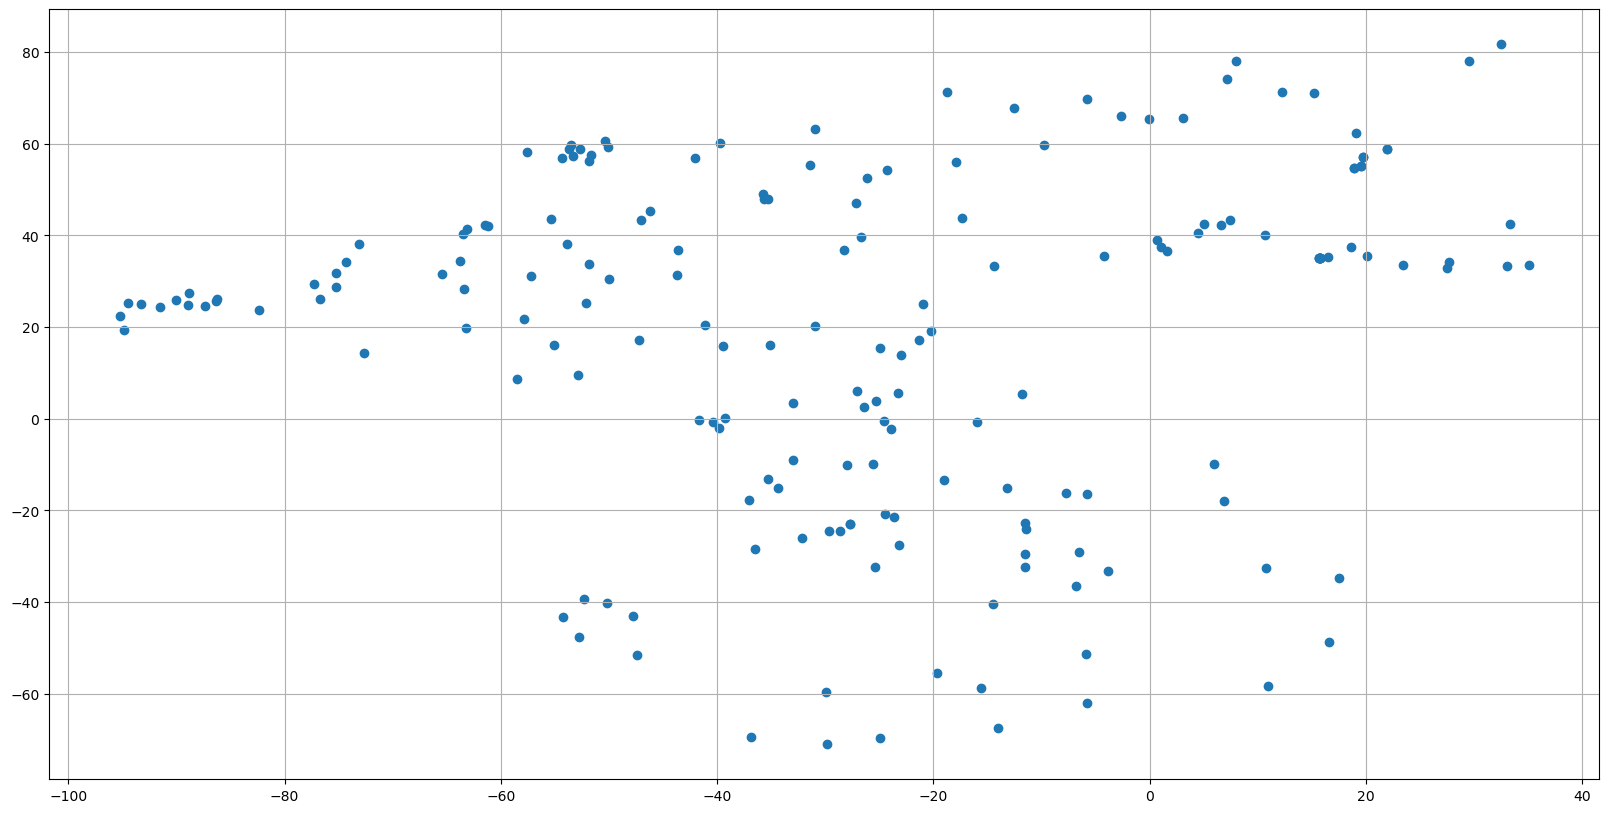

In [5]:
fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(dayADS.LONGITUDE, dayADS.LATITUDE)
ax.grid()

If we want to get a better map, we need cartopy. 

In [6]:
import cartopy.crs as ccrs
import cartopy

and we can color code, the quality flag of the positions:

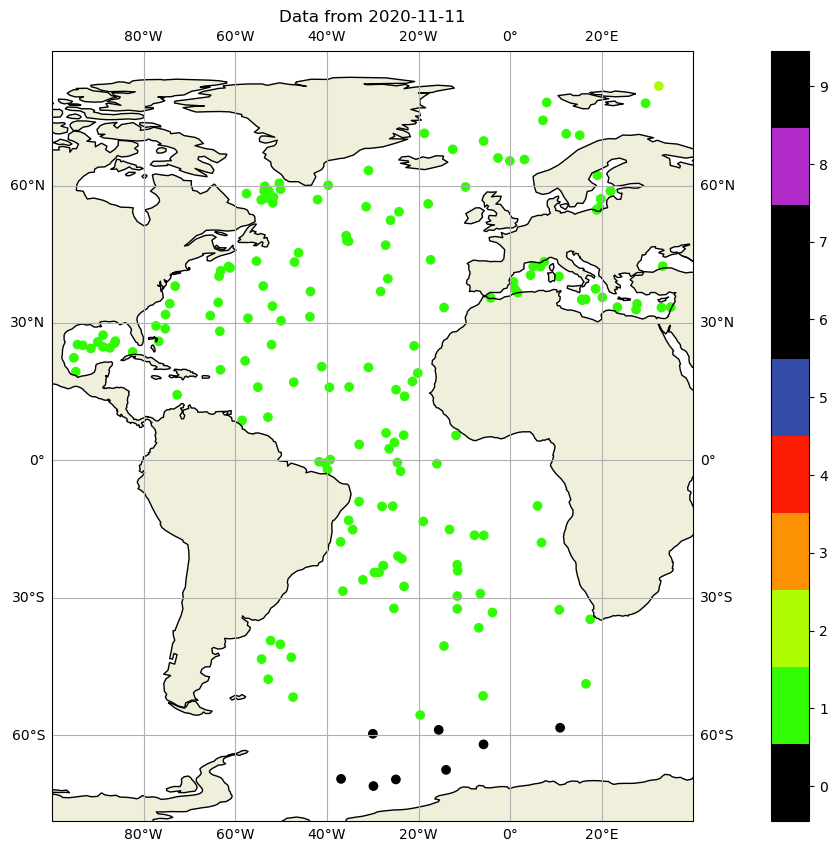

In [7]:
fig,ax = plt.subplots(figsize=(20,10),subplot_kw={'projection': ccrs.PlateCarree()})
sc=ax.scatter(dayADS.LONGITUDE,dayADS.LATITUDE,c=dayADS.POSITION_QC,vmin=0, vmax=8, cmap=qcmap)

ax.add_feature(cartopy.feature.LAND.with_scale('110m'))
ax.add_feature(cartopy.feature.COASTLINE.with_scale('110m'), edgecolor='black')

ax.set_title(f"Data from {dayADS.JULD[0].values.astype('datetime64[D]')}")

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
ax.set_xlim([-100, 40]);  
colorbar_qc(qcmap, ax=ax);

#### Temperature and salinity data

We can do something similar for salinity `PSAL` and temperature `TEMP` data, using a TS diagram:

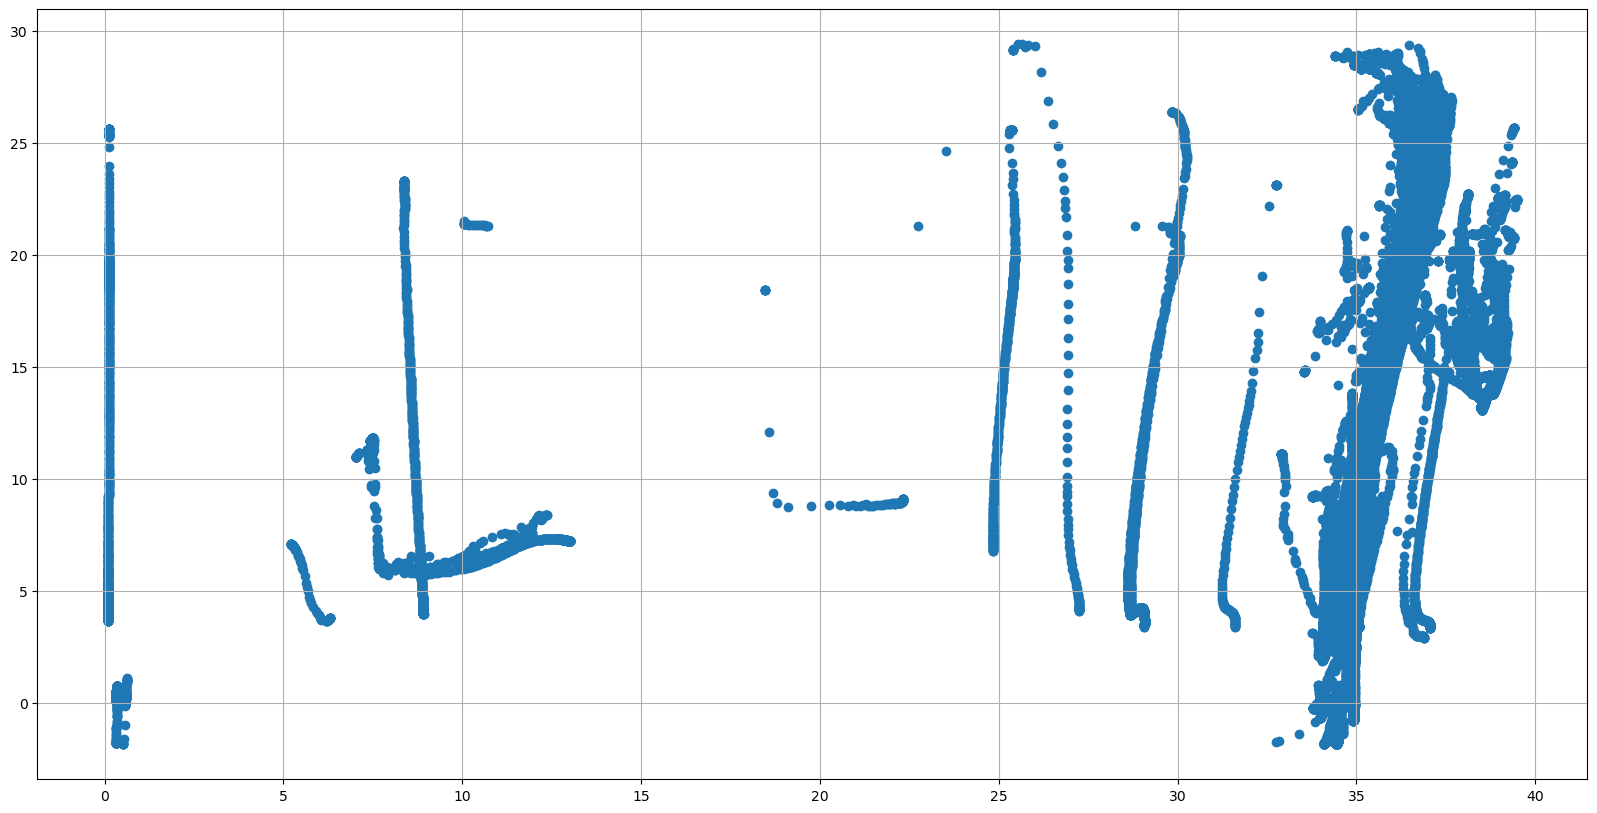

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(dayADS.PSAL, dayADS.TEMP)
ax.grid()

some data is obviously wrong, hence, let's check if all the QC is *Good data*, color coding it por salinity:

In [9]:
pres=dayADS.PRES
lon=dayADS.LONGITUDE+pres*0

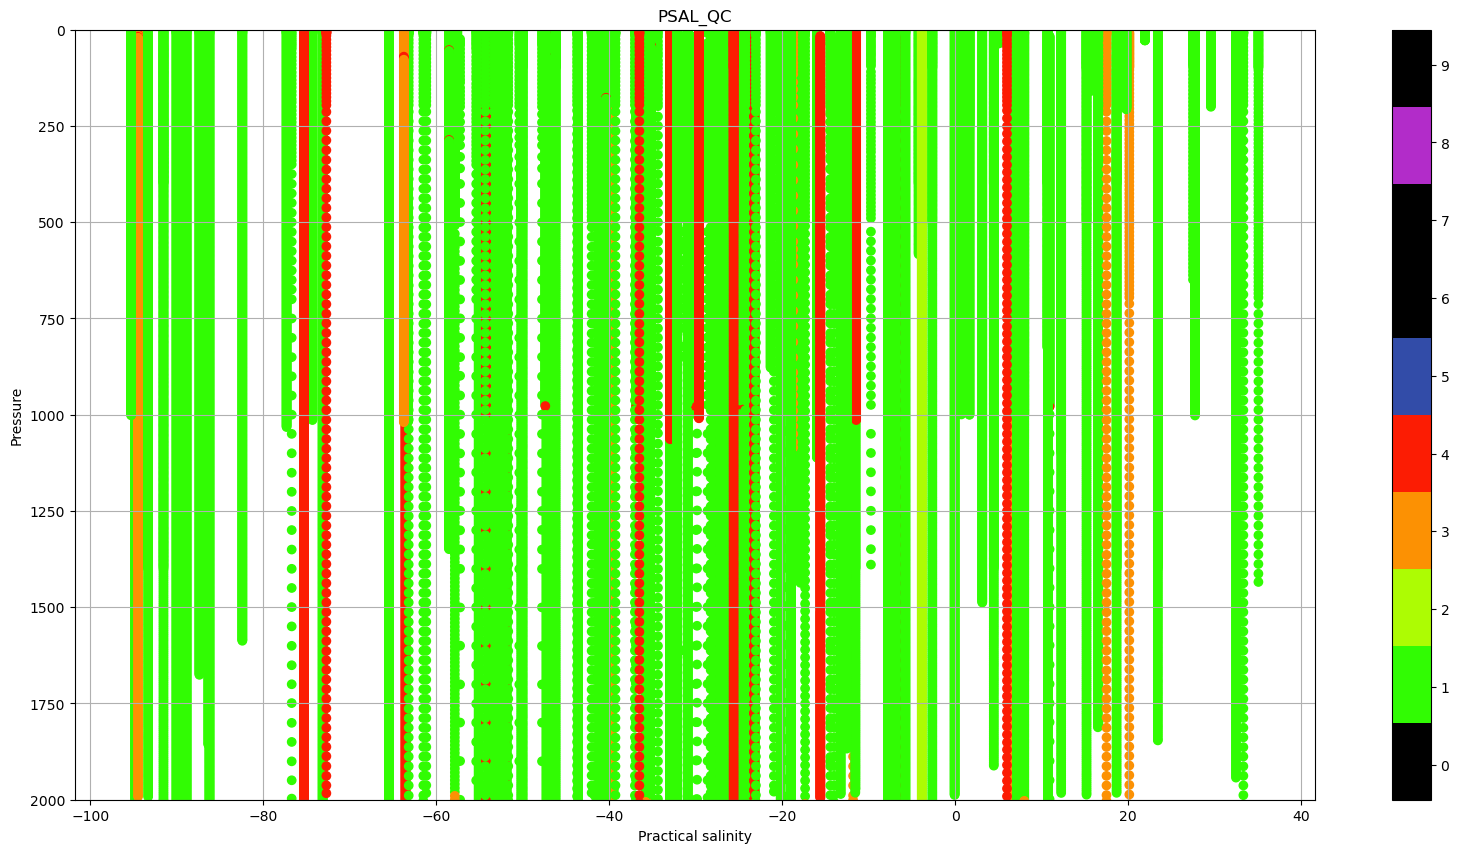

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(lon, pres, c=dayADS.PSAL_QC, vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax)
ax.grid()
ax.set_ylim(0,2000)
ax.invert_yaxis()
ax.set_xlabel(f"{dayADS.PSAL.long_name}")
ax.set_ylabel('Pressure')
ax.set_title('PSAL_QC');

There a lot of profiles with Quality Flag (QC) that indicate bad data. We can use this information to  plot the same TS diagram, but color coding the data based on the Quality flags.

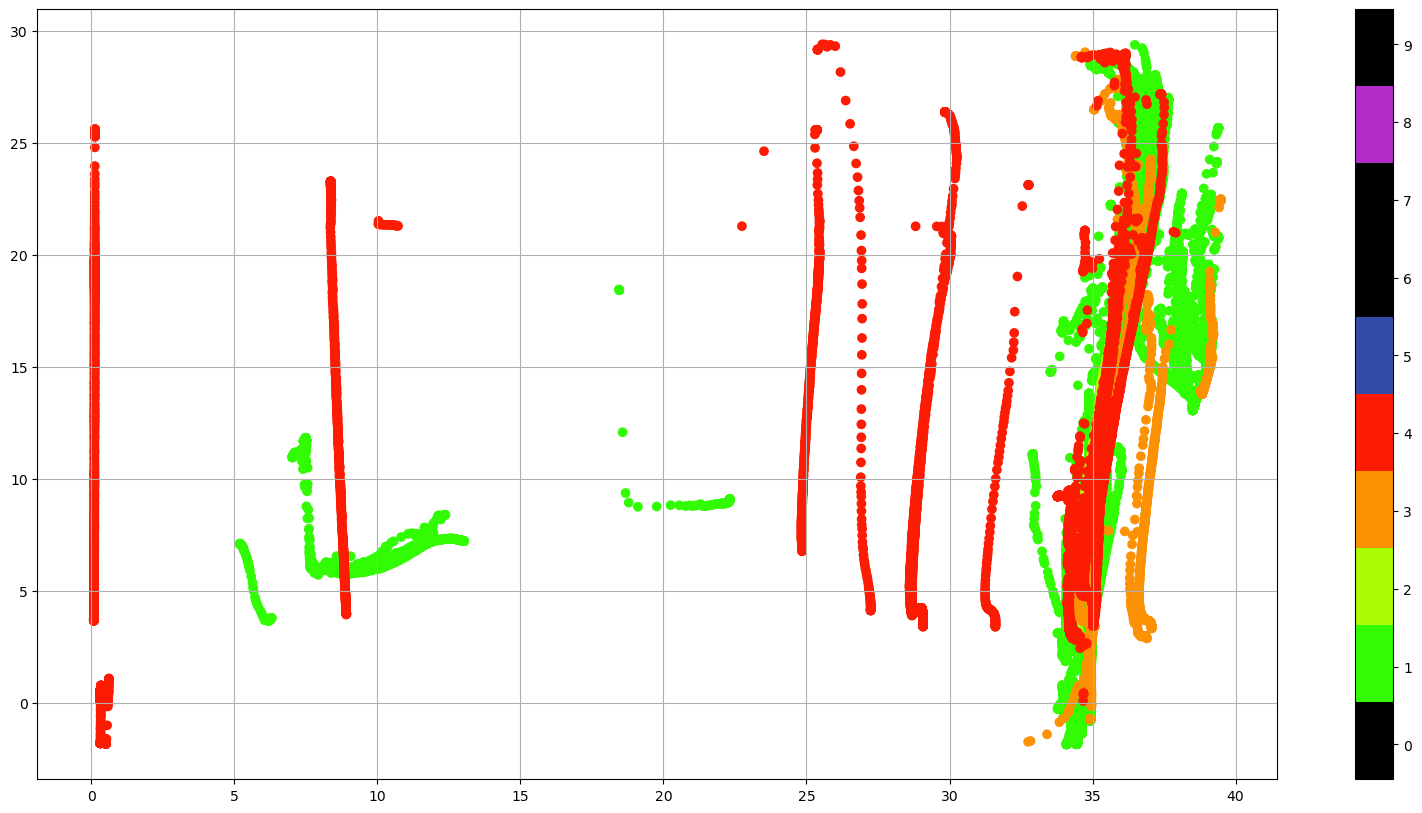

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(dayADS.PSAL.where(dayADS.PSAL_QC.values.astype(float) == 0), 
                dayADS.TEMP.where(dayADS.PSAL_QC.values.astype(float) == 0), 
                c=dayADS.PSAL_QC.where(dayADS.PSAL_QC.values.astype(float) == 0), vmin=0, vmax=9, cmap=qcmap)

sc = ax.scatter(dayADS.PSAL.where(dayADS.PSAL_QC.values.astype(float) == 1), 
                dayADS.TEMP.where(dayADS.PSAL_QC.values.astype(float) == 1), 
                c=dayADS.PSAL_QC.where(dayADS.PSAL_QC.values.astype(float) == 1), vmin=0, vmax=9, cmap=qcmap)

sc = ax.scatter(dayADS.PSAL.where(dayADS.PSAL_QC.values.astype(float) == 2), 
                dayADS.TEMP.where(dayADS.PSAL_QC.values.astype(float) == 2), 
                c=dayADS.PSAL_QC.where(dayADS.PSAL_QC.values.astype(float) == 2), vmin=0, vmax=9, cmap=qcmap)


sc = ax.scatter(dayADS.PSAL.where(dayADS.PSAL_QC.values.astype(float) == 3), 
                dayADS.TEMP.where(dayADS.PSAL_QC.values.astype(float) == 3), 
                c=dayADS.PSAL_QC.where(dayADS.PSAL_QC.values.astype(float) == 3), vmin=0, vmax=9, cmap=qcmap)


sc = ax.scatter(dayADS.PSAL.where(dayADS.PSAL_QC.values.astype(float) == 4), 
                dayADS.TEMP.where(dayADS.PSAL_QC.values.astype(float) == 4), 
                c=dayADS.PSAL_QC.where(dayADS.PSAL_QC.values.astype(float) == 4), vmin=0, vmax=9, cmap=qcmap)

colorbar_qc(qcmap, ax=ax)
ax.grid()

Using the QC flags we could just select the good data (QC=1) or, if we are familiar with the data, we can keep all the data that could be good, (QC=0, 1, 2 or 5) and decide what to do with the suspicious data.

Addtionally, there is a global quality flag for each one of the parameters, that indicate the percentage of good data in the profile. For salinitiy this global quality flag is `PROFILE_PSAL_QC`:


|    Flag   | Description |
| --------- | ----------- |
| A         |        N = 100% , all profile levels contain good data  |
| B         | 75% <= N < 100% |
| C         | 50% <= N <  75% |
| D         | 25% <= N <  50% |
| E         |  0% <= N <  25% |
| F         |        N = 0%, no profile levels have good data|



Example :

PROFILE_TEMP_QC = A : the temperature profile contains only good values

PROFILE_TEMP_QC = C : the salinity profile contains 50% to 75% good values

Based on this quality flag we could color-code the data:

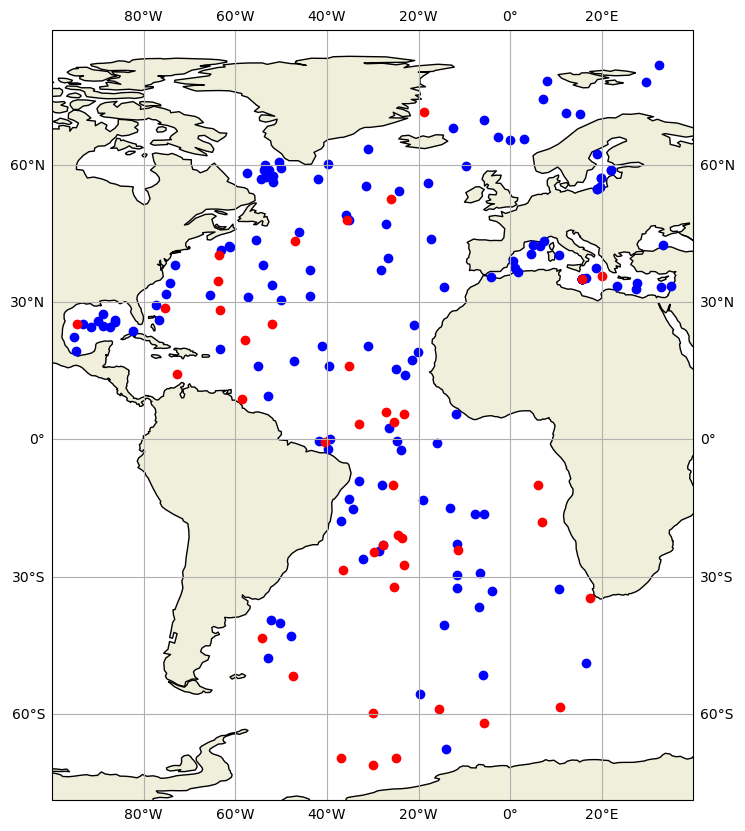

In [12]:
dayADS.LONGITUDE.where(dayADS.PROFILE_PSAL_QC.values.astype(str) == 'A')

fig,ax = plt.subplots(figsize=(20,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax.plot(dayADS.LONGITUDE.where(dayADS.PROFILE_PSAL_QC.values.astype(str) == 'A'), 
        dayADS.LATITUDE.where(dayADS.PROFILE_PSAL_QC.values.astype(str) == 'A'),
        'ob')
ax.plot(dayADS.LONGITUDE.where(dayADS.PROFILE_PSAL_QC.values.astype(str) == 'B'), 
        dayADS.LATITUDE.where(dayADS.PROFILE_PSAL_QC.values.astype(str) == 'B'),
        'or')
ax.plot(dayADS.LONGITUDE.where(dayADS.PROFILE_PSAL_QC.values.astype(str) == 'C'), 
        dayADS.LATITUDE.where(dayADS.PROFILE_PSAL_QC.values.astype(str) == 'C'),
        'or')
ax.plot(dayADS.LONGITUDE.where(dayADS.PROFILE_PSAL_QC.values.astype(str) == 'D'), 
        dayADS.LATITUDE.where(dayADS.PROFILE_PSAL_QC.values.astype(str) == 'D'),
        'or')
ax.plot(dayADS.LONGITUDE.where(dayADS.PROFILE_PSAL_QC.values.astype(str) == 'E'), 
        dayADS.LATITUDE.where(dayADS.PROFILE_PSAL_QC.values.astype(str) == 'E'),
        'or')
ax.plot(dayADS.LONGITUDE.where(dayADS.PROFILE_PSAL_QC.values.astype(str) == 'F'), 
        dayADS.LATITUDE.where(dayADS.PROFILE_PSAL_QC.values.astype(str) == 'F'),
        'or')

#ax.set_title(f"Data from {Rtraj.PLATFORM_NUMBER.values.astype(str)}")
ax.add_feature(cartopy.feature.LAND.with_scale('110m'))
ax.add_feature(cartopy.feature.COASTLINE.with_scale('110m'), edgecolor='black')

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
ax.set_xlim([-100, 40]);  

### QC flags for data accessed by float
Let's open the netCDF file of all the profiles for one float:

In [13]:
iwmo = 1900379
file = f"../../Data/202107-ArgoData/dac/coriolis/{iwmo}/{iwmo}_prof.nc"
prof = xr.open_dataset(file)

In [14]:
prof

<xarray.Dataset> Size: 387kB
Dimensions:                       (N_PROF: 78, N_PARAM: 3, N_LEVELS: 55,
                                   N_CALIB: 1, N_HISTORY: 0)
Dimensions without coordinates: N_PROF, N_PARAM, N_LEVELS, N_CALIB, N_HISTORY
Data variables: (12/64)
    DATA_TYPE                     object 8B ...
    FORMAT_VERSION                object 8B ...
    HANDBOOK_VERSION              object 8B ...
    REFERENCE_DATE_TIME           object 8B ...
    DATE_CREATION                 object 8B ...
    DATE_UPDATE                   object 8B ...
    ...                            ...
    HISTORY_ACTION                (N_HISTORY, N_PROF) object 0B ...
    HISTORY_PARAMETER             (N_HISTORY, N_PROF) object 0B ...
    HISTORY_START_PRES            (N_HISTORY, N_PROF) float32 0B ...
    HISTORY_STOP_PRES             (N_HISTORY, N_PROF) float32 0B ...
    HISTORY_PREVIOUS_VALUE        (N_HISTORY, N_PROF) float32 0B ...
    HISTORY_QCTEST                (N_HISTORY, N_PROF) object 0B ...
Attributes:
    title:                Argo float vertical profile
    institution:          FR GDAC
    source:               Argo float
    history:              2019-04-24T09:58:08Z creation
    references:           http://www.argodatamgt.org/Documentation
    user_manual_version:  3.1
    Conventions:          Argo-3.1 CF-1.6
    featureType:          trajectoryProfile

Using the QC flags we could just select the good data (QC=1) or, if we are familiar with the data, we can keep all the data that could be good, (QC=0, 1, 2 or 5) and decide what to do with the suspicious data.

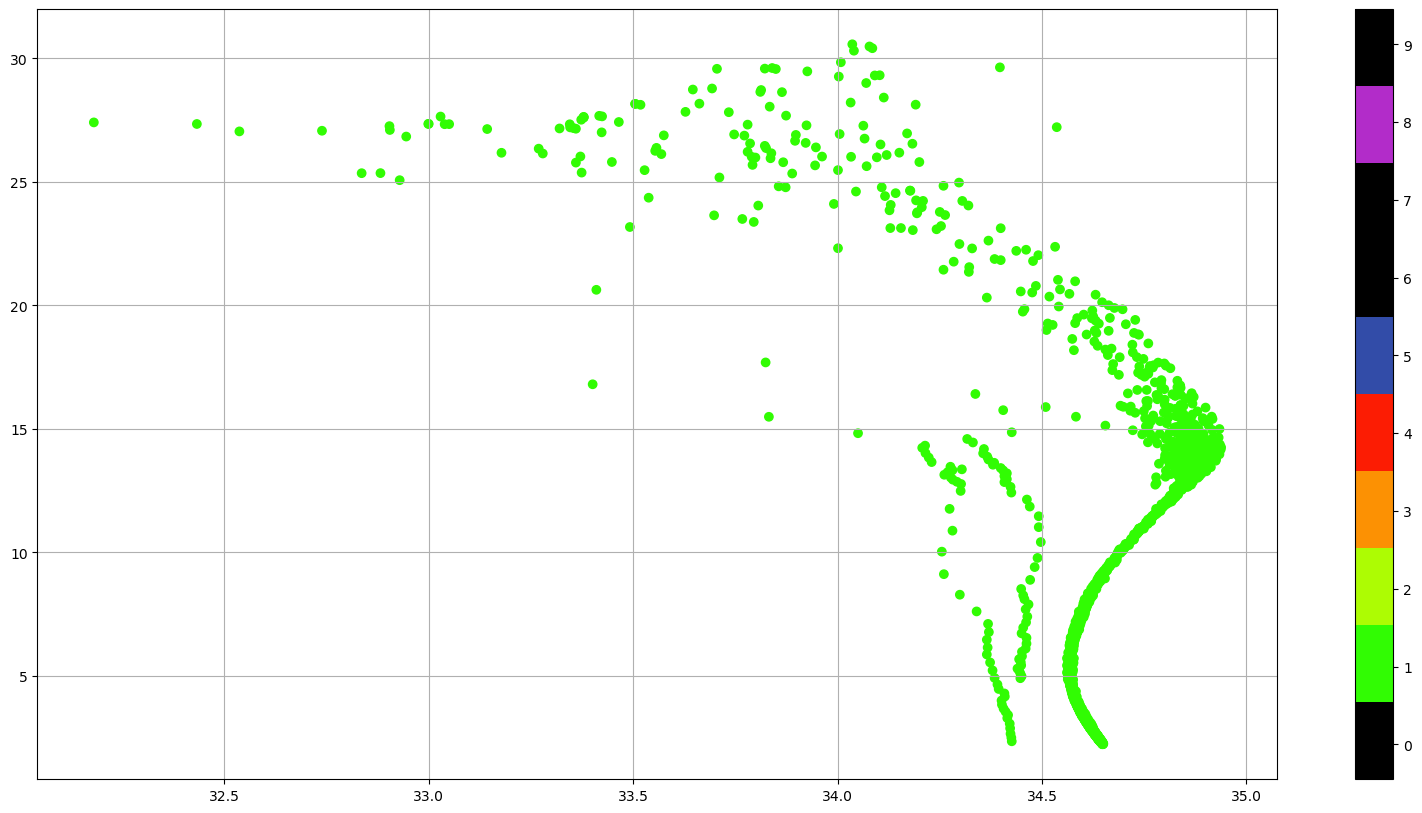

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(prof.PSAL.where(prof.PSAL_QC.values.astype(float) == 1), 
                prof.TEMP.where(prof.PSAL_QC.values.astype(float) == 1), 
                c=prof.PSAL_QC.where(prof.PSAL_QC.values.astype(float) == 1), vmin=0, vmax=9, cmap=qcmap)

sc = ax.scatter(prof.PSAL.where(prof.PSAL_QC.values.astype(float) == 0), 
                prof.TEMP.where(prof.PSAL_QC.values.astype(float) == 0), 
                c=prof.PSAL_QC.where(prof.PSAL_QC.values.astype(float) == 0), vmin=0, vmax=9, cmap=qcmap)

sc = ax.scatter(prof.PSAL.where(prof.PSAL_QC.values.astype(float) == 2), 
                prof.TEMP.where(prof.PSAL_QC.values.astype(float) == 2), 
                c=prof.PSAL_QC.where(prof.PSAL_QC.values.astype(float) == 2), vmin=0, vmax=9, cmap=qcmap)

sc = ax.scatter(prof.PSAL.where(prof.PSAL_QC.values.astype(float) == 5), 
                prof.TEMP.where(prof.PSAL_QC.values.astype(float) == 5), 
                c=prof.PSAL_QC.where(prof.PSAL_QC.values.astype(float) == 5), vmin=0, vmax=9, cmap=qcmap)

colorbar_qc(qcmap, ax=ax)
ax.grid()

or even see the vertical distribution of the QC Flags

In [16]:
pres=prof.PRES
cycle=prof.CYCLE_NUMBER+pres*0

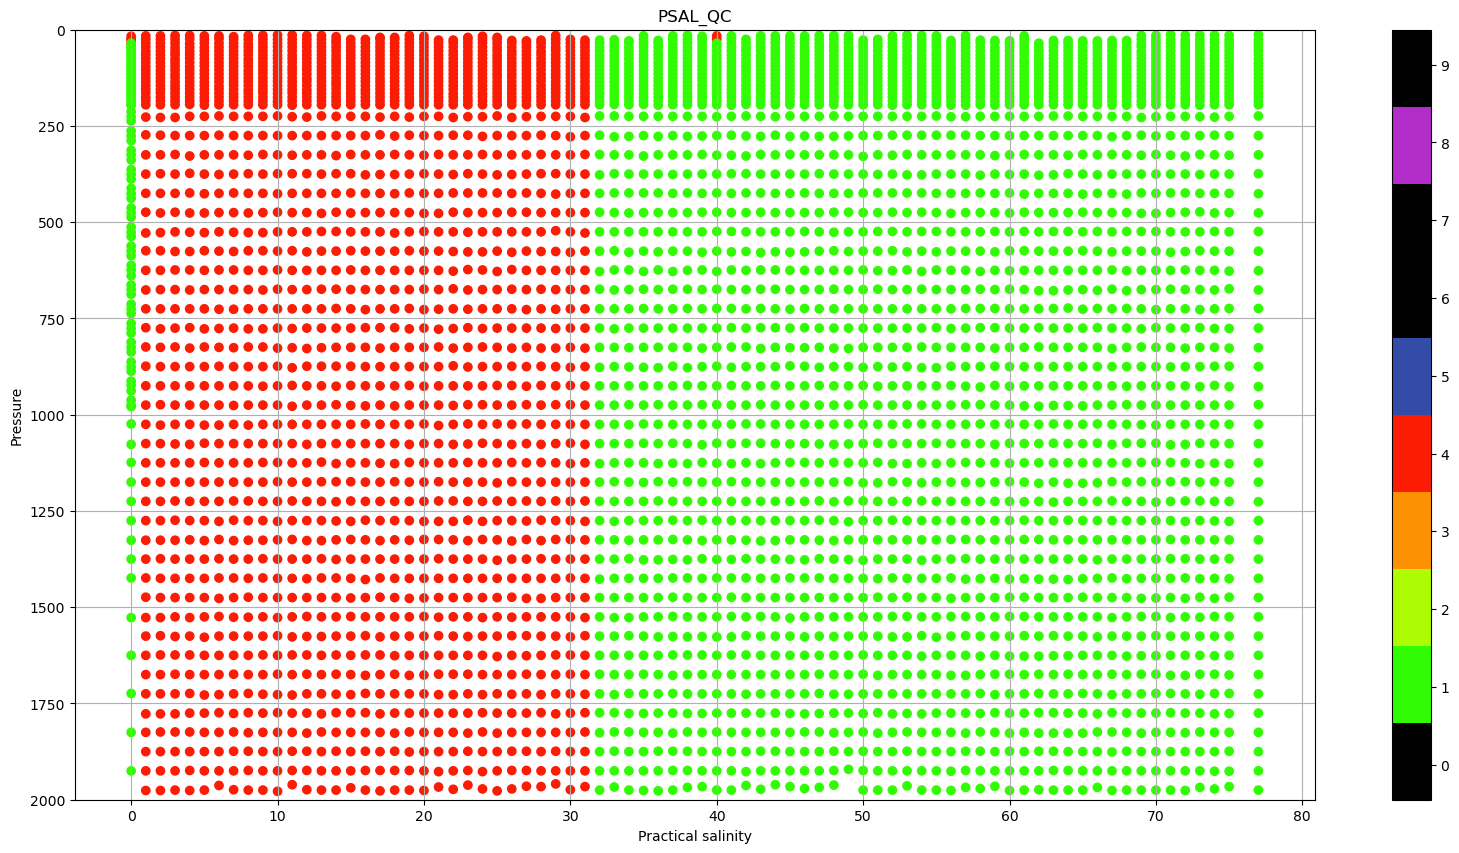

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(cycle, pres, c=prof.PSAL_QC, vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax)
ax.grid()
ax.set_ylim(0,2000)
ax.invert_yaxis()
ax.set_xlabel(f"{prof.PSAL.long_name}")
ax.set_ylabel('Pressure')
ax.set_title('PSAL_QC');  